In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
player = 'Mohammed Shami'
url = "http://search.espncricinfo.com/ci/content/player/search.html?search=" + player.lower().replace(" ","+") + "&x=0&y=0"
page = requests.get(url)

In [3]:
soup = BeautifulSoup(page.content, "html.parser")
player_id = str(soup.find_all(class_='ColumnistSmry')[0]).split('.html')[0].split('/')[-1]
df =pd.read_html(f"https://stats.espncricinfo.com/stats/engine/player/{player_id}.html?class=11;template=results;type=bowling;view=innings")[3]

In [4]:
df.head()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Unnamed: 7,Opposition,Ground,Start Date,Unnamed: 11
0,9.0,4,23,1,2.55,2,2,NaN,ODI v Pakistan,Delhi,6 Jan 2013,ODI # 3316
1,4.0,1,24,1,6.00,2,2,NaN,ODI v England,Kochi,15 Jan 2013,ODI # 3320
2,8.0,0,23,1,2.87,2,1,NaN,ODI v England,Ranchi,19 Jan 2013,ODI # 3322
3,8.0,0,58,0,7.25,2,1,NaN,ODI v England,Mohali,23 Jan 2013,ODI # 3327
4,9.0,1,46,1,5.11,2,2,NaN,ODI v England,Dharamsala,27 Jan 2013,ODI # 3329


In [5]:
del df['Unnamed: 11']

In [6]:
df

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Unnamed: 7,Opposition,Ground,Start Date
0,9.0,4,23,1,2.55,2,2,NaN,ODI v Pakistan,Delhi,6 Jan 2013
1,4.0,1,24,1,6.00,2,2,NaN,ODI v England,Kochi,15 Jan 2013
2,8.0,0,23,1,2.87,2,1,NaN,ODI v England,Ranchi,19 Jan 2013
3,8.0,0,58,0,7.25,2,1,NaN,ODI v England,Mohali,23 Jan 2013
4,9.0,1,46,1,5.11,2,2,NaN,ODI v England,Dharamsala,27 Jan 2013
...,...,...,...,...,...,...,...,...,...,...,...
230,31.0,3,134,2,4.32,1,1,NaN,Test v Australia,Ahmedabad,9 Mar 2023
231,8.0,1,19,0,2.37,3,3,NaN,Test v Australia,Ahmedabad,9 Mar 2023
232,6.0,2,17,3,2.83,1,1,NaN,ODI v Australia,Wankhede,17 Mar 2023
233,3.0,0,29,0,9.66,1,2,NaN,ODI v Australia,Visakhapatnam,19 Mar 2023


In [7]:
df5=df['Opposition'].str.split("v",expand = True)
df5

,0,1
0,ODI,Pakistan
1,ODI,England
2,ODI,England
3,ODI,England
4,ODI,England
...,...,...
230,Test,Australia
231,Test,Australia
232,ODI,Australia
233,ODI,Australia


In [8]:
df5_pd=pd.DataFrame(df5)
df5_pd

,0,1
0,ODI,Pakistan
1,ODI,England
2,ODI,England
3,ODI,England
4,ODI,England
...,...,...
230,Test,Australia
231,Test,Australia
232,ODI,Australia
233,ODI,Australia


In [9]:
df5_pd.rename(columns={0:'Format'},inplace=True)

In [10]:
df5_pd.rename(columns={1:'Teams'},inplace=True)

In [11]:
df5_pd

,Format,Teams
0,ODI,Pakistan
1,ODI,England
2,ODI,England
3,ODI,England
4,ODI,England
...,...,...
230,Test,Australia
231,Test,Australia
232,ODI,Australia
233,ODI,Australia


In [12]:
df_cricket=pd.concat([df,df5_pd],axis=1)
df_cricket

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Unnamed: 7,Opposition,Ground,Start Date,Format,Teams
0,9.0,4,23,1,2.55,2,2,NaN,ODI v Pakistan,Delhi,6 Jan 2013,ODI,Pakistan
1,4.0,1,24,1,6.00,2,2,NaN,ODI v England,Kochi,15 Jan 2013,ODI,England
2,8.0,0,23,1,2.87,2,1,NaN,ODI v England,Ranchi,19 Jan 2013,ODI,England
3,8.0,0,58,0,7.25,2,1,NaN,ODI v England,Mohali,23 Jan 2013,ODI,England
4,9.0,1,46,1,5.11,2,2,NaN,ODI v England,Dharamsala,27 Jan 2013,ODI,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,31.0,3,134,2,4.32,1,1,NaN,Test v Australia,Ahmedabad,9 Mar 2023,Test,Australia
231,8.0,1,19,0,2.37,3,3,NaN,Test v Australia,Ahmedabad,9 Mar 2023,Test,Australia
232,6.0,2,17,3,2.83,1,1,NaN,ODI v Australia,Wankhede,17 Mar 2023,ODI,Australia
233,3.0,0,29,0,9.66,1,2,NaN,ODI v Australia,Visakhapatnam,19 Mar 2023,ODI,Australia


In [13]:
df_cricket["Start Date"]=pd.to_datetime(df_cricket["Start Date"])
print(df_cricket.dtypes)

Overs                 object
Mdns                  object
Runs                  object
Wkts                  object
Econ                  object
Pos                   object
Inns                  object
Unnamed: 7           float64
Opposition            object
Ground                object
Start Date    datetime64[ns]
Format                object
Teams                 object
dtype: object


In [14]:
del df_cricket['Unnamed: 7']
del df_cricket['Opposition']

In [15]:
df_cricket['Teams'].unique()

array([' Pakistan', ' England', ' Sri Lanka', ' Zimbabwe', ' Australia',
       ' West Indies', ' South Africa', ' New Zealand', ' Bangladesh',
       ' Afghanistan', ' Ireland', ' Scotland', ' Namibia',
       ' Netherlands'], dtype=object)

In [16]:
df_cricket['Format'] = df_cricket['Format'].str.strip()
df_cricket['Teams'] = df_cricket['Teams'].str.strip()

In [17]:
df_cricket['Teams'].unique()

array(['Pakistan', 'England', 'Sri Lanka', 'Zimbabwe', 'Australia',
       'West Indies', 'South Africa', 'New Zealand', 'Bangladesh',
       'Afghanistan', 'Ireland', 'Scotland', 'Namibia', 'Netherlands'],
      dtype=object)

In [18]:
df_cricket

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams
0,9.0,4,23,1,2.55,2,2,Delhi,2013-01-06,ODI,Pakistan
1,4.0,1,24,1,6.00,2,2,Kochi,2013-01-15,ODI,England
2,8.0,0,23,1,2.87,2,1,Ranchi,2013-01-19,ODI,England
3,8.0,0,58,0,7.25,2,1,Mohali,2013-01-23,ODI,England
4,9.0,1,46,1,5.11,2,2,Dharamsala,2013-01-27,ODI,England
...,...,...,...,...,...,...,...,...,...,...,...
230,31.0,3,134,2,4.32,1,1,Ahmedabad,2023-03-09,Test,Australia
231,8.0,1,19,0,2.37,3,3,Ahmedabad,2023-03-09,Test,Australia
232,6.0,2,17,3,2.83,1,1,Wankhede,2023-03-17,ODI,Australia
233,3.0,0,29,0,9.66,1,2,Visakhapatnam,2023-03-19,ODI,Australia


In [19]:
mask= df_cricket['Start Date']>='01-01-2015'
mask
cricket=df_cricket[mask]
cricket

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams
61,28.3,3,112,5,3.92,3,1,Sydney,2015-01-06,Test,Australia
62,6.0,0,33,1,5.50,3,3,Sydney,2015-01-06,Test,Australia
63,8.1,0,44,1,5.38,3,2,Melbourne,2015-01-18,ODI,Australia
64,4.0,0,23,0,5.75,4,2,Brisbane,2015-01-20,ODI,England
65,TDNB,-,-,-,-,-,-,Sydney,2015-01-26,ODI,Australia
...,...,...,...,...,...,...,...,...,...,...,...
230,31.0,3,134,2,4.32,1,1,Ahmedabad,2023-03-09,Test,Australia
231,8.0,1,19,0,2.37,3,3,Ahmedabad,2023-03-09,Test,Australia
232,6.0,2,17,3,2.83,1,1,Wankhede,2023-03-17,ODI,Australia
233,3.0,0,29,0,9.66,1,2,Visakhapatnam,2023-03-19,ODI,Australia


In [20]:
cricket['Overs']=='DNB'
cricket[cricket['Overs'] == 'DNB']
cricket.drop(cricket.index[cricket['Overs'] == 'DNB'], inplace=True)


C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\1386389760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket.drop(cricket.index[cricket['Overs'] == 'DNB'], inplace=True)


In [21]:
cricket['Overs']=='TDNB'
cricket[cricket['Overs']=='TDNB']
cricket.drop(cricket.index[cricket['Overs'] == 'TDNB'], inplace=True)


C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\3810577657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket.drop(cricket.index[cricket['Overs'] == 'TDNB'], inplace=True)


In [22]:
cricket['Ground'].unique()

array(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide', 'Hamilton',
       'Auckland', 'North Sound', 'Kingston', 'Gros Islet',
       'Port of Spain', 'Lauderhill', 'Kanpur', 'Eden Gardens', 'Indore',
       'Rajkot', 'Visakhapatnam', 'Mohali', 'Galle', 'Colombo (SSC)',
       'Pallekele', 'Bengaluru', 'Delhi', 'Cape Town', 'Centurion',
       'Johannesburg', 'Birmingham', "Lord's", 'Nottingham',
       'Southampton', 'The Oval', 'Guwahati', 'Napier', 'Mount Maunganui',
       'Wellington', 'Hyderabad', 'Nagpur', 'Ranchi', 'Manchester',
       'Providence', 'Pune', 'Wankhede', 'Chennai', 'Cuttack',
       'Christchurch', 'Canberra', 'Leeds', 'Dubai (DSC)', 'Abu Dhabi',
       'Thiruvananthapuram', 'Raipur', 'Ahmedabad'], dtype=object)

In [23]:
Home=cricket['Ground'] = cricket['Ground'].replace(['Dharamsala', 'Cuttack',
       'Kanpur', 'Indore', 'Rajkot', 'Chennai', 'Wankhede', 'Bengaluru', 'Ranchi',
       'Visakhapatnam', 'Hyderabad', 'Guwahati','Mohali', 'Nagpur',
       'Delhi', 'Eden Gardens', 'Pune', 'Thiruvananthapuram', 'Brabourne', 'Ahmedabad',
       'Raipur','Jaipur','Lucknow'], 'Home')
Home

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\4010643379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Home=cricket['Ground'] = cricket['Ground'].replace(['Dharamsala', 'Cuttack',


61        Sydney
62        Sydney
63     Melbourne
64      Brisbane
66         Perth
         ...    
230         Home
231         Home
232         Home
233         Home
234         Home
Name: Ground, Length: 171, dtype: object

In [24]:
Away=cricket['Ground'] = cricket['Ground'].replace([ 'Canberra','Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth', 'Hamilton', 'Auckland', 'Fatullah', 'Mirpur',
       'Galle', 'Colombo (PSS)', 'Colombo (SSC)',  'North Sound', 'Kingston', 'Gros Islet',
       'Lauderhill', 'Birmingham', 'The Oval', 'Port of Spain',
       'Pallekele', 'Dambulla', 'Colombo (RPS)', 
       'Cape Town', 'Centurion', 'Johannesburg', 'Durban', 'Gqeberha',
       'Dublin (Malahide)', 'Manchester', 'Cardiff', 'Bristol',
       'Nottingham', "Lord's", 'Leeds', 'Southampton',
       'Napier', 'Mount Maunganui', 'Providence', 'Wellington',
       'Christchurch', 'Dubai (DSC)', 'Paarl', 'Chattogram','East London', 'Away', 'Bloemfontein', 'Basseterre',
       'Bridgetown', 'Benoni', 'Hobart', 'Dunedin', 'Potchefstroom',
       'Carrara', 'Chester-le-Street', 'Karachi',  'Abu Dhabi', 'Tarouba'], 'Away')
Away

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\3459905788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Away=cricket['Ground'] = cricket['Ground'].replace([ 'Canberra','Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth', 'Hamilton', 'Auckland', 'Fatullah', 'Mirpur',


61     Away
62     Away
63     Away
64     Away
66     Away
       ... 
230    Home
231    Home
232    Home
233    Home
234    Home
Name: Ground, Length: 171, dtype: object

In [25]:
cricket['Teams'].unique()

array(['Australia', 'England', 'Pakistan', 'South Africa', 'West Indies',
       'Ireland', 'Zimbabwe', 'Bangladesh', 'New Zealand', 'Sri Lanka',
       'Afghanistan', 'Scotland', 'Namibia', 'Netherlands'], dtype=object)

In [26]:
Others=cricket['Teams']=cricket['Teams'].replace(['Namibia','Netherlands','U.A.E.','Zimbabwe','Afghanistan','Scotland', 'Ireland','Bangladesh'],'Others')
Others

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\2519963660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Others=cricket['Teams']=cricket['Teams'].replace(['Namibia','Netherlands','U.A.E.','Zimbabwe','Afghanistan','Scotland', 'Ireland','Bangladesh'],'Others')


61     Australia
62     Australia
63     Australia
64       England
66       England
         ...    
230    Australia
231    Australia
232    Australia
233    Australia
234    Australia
Name: Teams, Length: 171, dtype: object

In [27]:
cricket['Teams'].unique()

array(['Australia', 'England', 'Pakistan', 'South Africa', 'West Indies',
       'Others', 'New Zealand', 'Sri Lanka'], dtype=object)

In [28]:
cricket.head()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams
61,28.3,3,112,5,3.92,3,1,Away,2015-01-06,Test,Australia
62,6.0,0,33,1,5.50,3,3,Away,2015-01-06,Test,Australia
63,8.1,0,44,1,5.38,3,2,Away,2015-01-18,ODI,Australia
64,4.0,0,23,0,5.75,4,2,Away,2015-01-20,ODI,England
66,9.0,0,31,1,3.44,3,2,Away,2015-01-30,ODI,England


In [29]:
cricket['Overs'] = cricket['Overs'].astype(float)
cricket['Econ'] = cricket['Econ'].astype(float)
cricket['Mdns'] = cricket['Mdns'].astype(int)
cricket['Wkts'] = cricket['Wkts'].astype(int)
cricket['Runs'] = cricket['Runs'].astype(int)


C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\2422382378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket['Overs'] = cricket['Overs'].astype(float)
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\2422382378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket['Econ'] = cricket['Econ'].astype(float)
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\2422382378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [30]:
cricket['Overs']= (cricket['Overs']*6)
cricket['Overs']
cricket.rename(columns = {'Overs':'Balls Bowled'}, inplace = True)

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\3437462676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket['Overs']= (cricket['Overs']*6)
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\3437462676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket.rename(columns = {'Overs':'Balls Bowled'}, inplace = True)


In [31]:
cricket['Date']=cricket['Start Date'].dt.year
cricket

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\1461710538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket['Date']=cricket['Start Date'].dt.year


,Balls Bowled,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams,Date
61,169.8,3,112,5,3.92,3,1,Away,2015-01-06,Test,Australia,2015
62,36.0,0,33,1,5.50,3,3,Away,2015-01-06,Test,Australia,2015
63,48.6,0,44,1,5.38,3,2,Away,2015-01-18,ODI,Australia,2015
64,24.0,0,23,0,5.75,4,2,Away,2015-01-20,ODI,England,2015
66,54.0,0,31,1,3.44,3,2,Away,2015-01-30,ODI,England,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
230,186.0,3,134,2,4.32,1,1,Home,2023-03-09,Test,Australia,2023
231,48.0,1,19,0,2.37,3,3,Home,2023-03-09,Test,Australia,2023
232,36.0,2,17,3,2.83,1,1,Home,2023-03-17,ODI,Australia,2023
233,18.0,0,29,0,9.66,1,2,Home,2023-03-19,ODI,Australia,2023


In [32]:
OdI= cricket['Format']== 'ODI'
Odi=cricket[OdI]
Odi

,Balls Bowled,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams,Date
63,48.6,0,44,1,5.38,3,2,Away,2015-01-18,ODI,Australia,2015
64,24.0,0,23,0,5.75,4,2,Away,2015-01-20,ODI,England,2015
66,54.0,0,31,1,3.44,3,2,Away,2015-01-30,ODI,England,2015
67,54.0,1,35,4,3.88,2,2,Away,2015-02-15,ODI,Pakistan,2015
68,48.0,1,30,2,3.75,2,2,Away,2015-02-22,ODI,South Africa,2015
69,48.0,2,35,3,4.37,1,1,Away,2015-03-06,ODI,West Indies,2015
70,54.0,0,41,3,4.55,2,1,Away,2015-03-10,ODI,Others,2015
71,54.0,2,48,3,5.33,1,1,Away,2015-03-14,ODI,Others,2015
72,48.0,1,37,2,4.62,2,2,Away,2015-03-19,ODI,Others,2015
73,60.0,0,68,0,6.80,1,1,Away,2015-03-26,ODI,Australia,2015


In [33]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']
list1= ['Home',"Away"]
data2 = []
for i in list :
    for j in list1:
        a=Odi[(Odi['Teams']==i) &(Odi['Ground']==j)]
        k=data2.append([i,j,(a["Balls Bowled"].sum())/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\34264994.py:7: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,j,(a["Balls Bowled"].sum())/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\34264994.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,j,(a["Balls Bowled"].sum())/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])


In [34]:
ODIHA = pd.DataFrame(data2,columns=["Team","Venue","Overs","Mdns","Wkts","Econ","Conceeded","Average",'Inns'])

In [35]:
ODIHA

,Team,Venue,Overs,Mdns,Wkts,Econ,Conceeded,Average,Inns
0,Australia,Home,91.4,5,15,6.212727,556,37.066667,11
1,Australia,Away,66.5,0,10,5.921429,395,39.500000,7
2,England,Home,0.0,0,0,NaN,0,NaN,0
3,England,Away,47.0,1,10,5.121667,240,24.000000,6
4,Pakistan,Home,0.0,0,0,NaN,0,NaN,0
5,Pakistan,Away,9.0,1,4,3.880000,35,8.750000,1
6,South Africa,Home,0.0,0,0,NaN,0,NaN,0
7,South Africa,Away,8.0,1,2,3.750000,30,15.000000,1
8,West Indies,Home,46.3,3,8,6.426000,302,37.750000,5
9,West Indies,Away,52.2,5,15,4.094286,226,15.066667,7


In [36]:
df['Wkts'].sum()

'11101011211313451112133323104321113424302101211102132344221425110-142333204022030120233002012320402120230422113141530311240220212306122003231322012445102222230521233420213103400211-403100-40312140033053212112202031011112010213124020300'

In [37]:
Test= cricket['Format']== 'Test'
test=cricket[Test]
test


,Balls Bowled,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams,Date
61,169.8,3,112,5,3.92,3,1,Away,2015-01-06,Test,Australia,2015
62,36.0,0,33,1,5.50,3,3,Away,2015-01-06,Test,Australia,2015
74,120.0,4,66,4,3.30,3,2,Away,2016-07-21,Test,West Indies,2016
75,60.0,3,26,0,2.60,2,3,Away,2016-07-21,Test,West Indies,2016
76,60.0,3,23,2,2.30,2,1,Away,2016-07-30,Test,West Indies,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
227,25.8,1,13,2,2.88,1,3,Home,2023-02-09,Test,Australia,2023
228,86.4,4,60,4,4.09,1,1,Home,2023-02-17,Test,Australia,2023
229,12.0,0,10,0,5.00,2,3,Home,2023-02-17,Test,Australia,2023
230,186.0,3,134,2,4.32,1,1,Home,2023-03-09,Test,Australia,2023


In [38]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']
list1= ['Home',"Away"]
data2 = []
for i in list :
    for j in list1:
        a=test[(test['Teams']==i) &(test['Ground']==j)]
        k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\4257517625.py:7: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\4257517625.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])


In [39]:
TestHA = pd.DataFrame(data2,columns=["Team","Venue","Overs","Mdns","Wkts","Econ","Conceeded","Average",'Inns'])

In [40]:
TestHA

,Team,Venue,Overs,Mdns,Wkts,Econ,Conceeded,Average,Inns
0,Australia,Home,68.7,13,9,3.443333,254,28.222222,6
1,Australia,Away,187.7,35,22,3.213636,605,27.500000,11
2,England,Home,102.6,22,10,2.431667,252,25.200000,6
3,England,Away,305.9,50,29,3.486875,1067,36.793103,16
4,Pakistan,Home,0.0,0,0,NaN,0,NaN,0
5,Pakistan,Away,0.0,0,0,NaN,0,NaN,0
6,South Africa,Home,74.5,21,13,2.565000,192,14.769231,6
7,South Africa,Away,185.3,39,29,2.963333,550,18.965517,12
8,West Indies,Home,12.0,2,2,3.050000,33,16.500000,2
9,West Indies,Away,144.0,31,20,2.881818,444,22.200000,11


In [41]:
T20s= cricket['Format']== 'T20I'
T20s=cricket[T20s]
T20s

,Balls Bowled,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams,Date
81,24.0,0,48,1,12.00,1,1,Away,2016-08-27,T20I,West Indies,2016
82,14.4,0,31,2,11.62,2,1,Away,2016-08-28,T20I,West Indies,2016
97,18.0,0,46,0,15.33,3,2,Away,2017-07-09,T20I,West Indies,2017
168,24.0,0,25,2,6.25,3,2,Home,2019-12-11,T20I,West Indies,2019
175,24.0,0,53,0,13.25,3,1,Away,2020-01-24,T20I,New Zealand,2020
176,24.0,0,22,0,5.50,2,1,Away,2020-01-26,T20I,New Zealand,2020
177,24.0,0,32,2,8.00,2,2,Away,2020-01-29,T20I,New Zealand,2020
185,24.0,0,46,0,11.50,3,2,Away,2020-12-04,T20I,Australia,2020
195,21.0,0,43,0,11.21,2,2,Away,2021-10-24,T20I,Pakistan,2021
196,6.0,0,11,0,11.00,4,2,Away,2021-10-31,T20I,New Zealand,2021


In [42]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']
list1= ['Home',"Away"]
data2 = []
for i in list :
    for j in list1:
        a=T20s[(T20s['Teams']==i) &(T20s['Ground']==j)]
        k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\4121562618.py:7: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\4121562618.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\4121562618.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  k=data2.append([i,j,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])


In [43]:
T20HA=pd.DataFrame(data2,columns=["Team","Venue","Overs","Mdns","Wkts","Econ",'conceeded',"Average",'Inns'])
T20HA

,Team,Venue,Overs,Mdns,Wkts,Econ,conceeded,Average,Inns
0,Australia,Home,0.0,0,0,NaN,0,NaN,0
1,Australia,Away,4.0,0,0,11.500000,46,inf,1
2,England,Home,0.0,0,0,NaN,0,NaN,0
3,England,Away,3.0,0,0,13.000000,39,inf,1
4,Pakistan,Home,0.0,0,0,NaN,0,NaN,0
5,Pakistan,Away,7.5,0,1,8.730000,68,68.000000,2
6,South Africa,Home,0.0,0,0,NaN,0,NaN,0
7,South Africa,Away,4.0,0,1,3.250000,13,13.000000,1
8,West Indies,Home,4.0,0,2,6.250000,25,12.500000,1
9,West Indies,Away,9.4,0,3,12.983333,125,41.666667,3


In [44]:
T20HA.fillna(0,inplace=True)
T20HA['Average']=T20HA['Average'].replace(np.inf, 0)

In [45]:
T20HA

,Team,Venue,Overs,Mdns,Wkts,Econ,conceeded,Average,Inns
0,Australia,Home,0.0,0,0,0.000000,0,0.000000,0
1,Australia,Away,4.0,0,0,11.500000,46,0.000000,1
2,England,Home,0.0,0,0,0.000000,0,0.000000,0
3,England,Away,3.0,0,0,13.000000,39,0.000000,1
4,Pakistan,Home,0.0,0,0,0.000000,0,0.000000,0
5,Pakistan,Away,7.5,0,1,8.730000,68,68.000000,2
6,South Africa,Home,0.0,0,0,0.000000,0,0.000000,0
7,South Africa,Away,4.0,0,1,3.250000,13,13.000000,1
8,West Indies,Home,4.0,0,2,6.250000,25,12.500000,1
9,West Indies,Away,9.4,0,3,12.983333,125,41.666667,3


In [46]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']

data2 = []
for i in list :
    a=Odi[(Odi['Teams']==i)]
    k=data2.append([i,(a["Balls Bowled"].sum())/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

In [47]:
ODI = pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ","Conceeded","Average","Inns"])
ODI['Average']=ODI['Average'].round(2)
ODI

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,Inns
0,Australia,157.9,5,25,6.099444,951,38.04,18
1,England,47.0,1,10,5.121667,240,24.00,6
2,Pakistan,9.0,1,4,3.880000,35,8.75,1
3,South Africa,8.0,1,2,3.750000,30,15.00,1
4,West Indies,98.5,8,23,5.065833,528,22.96,12
5,Sri Lanka,22.0,2,3,5.636667,130,43.33,3
6,New Zealand,54.1,4,14,5.144286,288,20.57,7
7,Others,44.5,4,13,5.222000,234,18.00,5


In [48]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']

data2 = []
for i in list :
    a=T20s[(T20s['Teams']==i) ]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\1064160939.py:6: RuntimeWarning: divide by zero encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\1064160939.py:6: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\1064160939.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])


In [49]:
T20=pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ",'conceeded',"Average","Inns"])
T20.fillna(0,inplace=True)
T20['Average']=T20['Average'].replace(np.inf, 0)
T20['Average']=T20['Average'].round(2)
T20

,Team,Overs,Mdns,Wkts,Econ,conceeded,Average,Inns
0,Australia,4.0,0,0,11.500000,46,0.0,1
1,England,3.0,0,0,13.000000,39,0.0,1
2,Pakistan,7.5,0,1,8.730000,68,68.0,2
3,South Africa,4.0,0,1,3.250000,13,13.0,1
4,West Indies,13.4,0,5,11.300000,150,30.0,4
5,Sri Lanka,0.0,0,0,0.000000,0,0.0,0
6,New Zealand,13.0,0,2,9.437500,118,59.0,4
7,Others,20.0,1,10,7.471667,152,15.2,6


In [50]:
list = ["Australia",'England', 'Pakistan', 'South Africa','West Indies','Sri Lanka','New Zealand','Others']

data2 = []
for i in list :
    a=test[(test['Teams']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\2782578727.py:6: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\2782578727.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])


In [51]:
Test_overall = pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ","Conceeded","Average",'Strike Rate','Inns'])
Test_overall

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,Strike Rate,Inns
0,Australia,256.4,48,31,3.294706,859,27.709677,49.625806,17
1,England,408.5,72,39,3.199091,1319,33.820513,62.846154,22
2,Pakistan,0.0,0,0,NaN,0,NaN,NaN,0
3,South Africa,259.8,60,42,2.830556,742,17.666667,37.114286,18
4,West Indies,156.0,33,22,2.907692,477,21.681818,42.545455,13
5,Sri Lanka,169.1,41,24,3.360714,565,23.541667,42.275000,14
6,New Zealand,160.7,27,17,3.330909,533,31.352941,56.717647,11
7,Others,47.3,14,9,3.167500,136,15.111111,31.533333,4


# ODI yearwise

In [52]:
list1= [2015,2016,2017,2018,2019,2020,2021,2022]

data2 = []
for i in list1 :
    a=Odi[(Odi['Date']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\4119858026.py:6: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\4119858026.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),a["Teams"].count()])


In [53]:
ODI_yearwise = pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ","Conceeded","Average",'Inns'])
ODI_yearwise['Average']=ODI_yearwise['Average'].round(2)
ODI_yearwise['Econ']=ODI_yearwise['Econ'].round(2)


In [54]:
ODI_yearwise=ODI_yearwise.replace(np.nan, 0)
ODI_yearwise

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,Inns
0,2015,82.1,7,19,4.79,392,20.63,10
1,2016,0.0,0,0,0.00,0,0.00,0
2,2017,30.0,3,4,4.77,143,35.75,3
3,2018,20.0,0,3,7.00,140,46.67,2
4,2019,176.4,10,42,5.20,951,22.64,21
5,2020,55.5,0,12,7.07,393,32.75,6
6,2021,0.0,0,0,0.00,0,0.00,0
7,2022,24.0,0,4,4.88,117,29.25,3


In [55]:
list1= [2015,2016,2017,2018,2019,2020,2021,2022]

data2 = []
for i in list1 :
    a=test[(test['Date']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

In [56]:
Test_yearwise = pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ","Conceeded","Average","strike rate",'Inns'])
Test_yearwise['Average']=Test_yearwise['Average'].round(2)
Test_yearwise['strike rate']=Test_yearwise['strike rate'].round(2)
Test_yearwise['Econ']=Test_yearwise['Econ'].round(2)
Test_yearwise=Test_yearwise.replace(np.nan, 0)
Test_yearwise

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,2015,34.3,3,6,4.71,145,24.17,34.30,2
1,2016,270.7,52,29,2.84,779,26.86,56.01,19
2,2017,137.1,34,19,3.15,446,23.47,43.29,10
3,2018,383.1,68,47,3.32,1268,26.98,48.91,23
4,2019,193.8,49,33,2.82,550,16.67,35.24,16
5,2020,66.1,10,5,3.38,224,44.80,79.32,4
6,2021,166.0,38,23,2.97,517,22.48,43.30,9
7,2022,138.0,28,13,3.42,448,34.46,63.69,10


In [57]:
list1= [2015,2016,2017,2018,2019,2020,2021,2022]

data2 = []
for i in list1 :
    a=T20s[(T20s['Date']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\1371482602.py:6: RuntimeWarning: invalid value encountered in double_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\1371482602.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])
C:\Users\bisht\AppData\Local\Temp\ipykernel_20068\1371482602.py:6: RuntimeWarning: divide by zero encountered in longlong_scalars
  k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"

In [58]:
T20_yearwise = pd.DataFrame(data2,columns=["Team","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
T20_yearwise['Average']=T20_yearwise['Average'].round(2)
T20_yearwise['Econ']=T20_yearwise['Econ'].round(2)
T20_yearwise['strike rate']=T20_yearwise['strike rate'].round(2)
T20_yearwise=T20_yearwise.replace(np.nan,0)
T20_yearwise

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,2015,0.0,0,0,0.00,0,0.00,0.0,0
1,2016,6.4,0,3,11.81,79,26.33,12.8,2
2,2017,3.0,0,0,15.33,46,inf,inf,1
3,2018,0.0,0,0,0.00,0,0.00,0.0,0
4,2019,4.0,0,2,6.25,25,12.50,12.0,1
5,2020,16.0,0,2,9.56,153,76.50,48.0,4
6,2021,15.5,1,6,8.99,140,23.33,15.5,5
7,2022,20.0,0,6,7.43,143,23.83,20.0,6


In [59]:
list1= ['Home','Away']

data2 = []
for i in list1 :
    a=Odi[(Odi['Ground']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

In [60]:
ODI_HA = pd.DataFrame(data2,columns=["Ground","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
ODI_HA['Average']=ODI_HA['Average'].round(2)
ODI_HA['Econ']=ODI_HA['Econ'].round(2)
ODI_HA['strike rate']=ODI_HA['strike rate'].round(2)
ODI_HA=ODI_HA.replace(np.nan,0)
ODI_HA

,Ground,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,Home,175.7,12,30,6.06,1075,35.83,35.14,21
1,Away,265.3,14,64,5.02,1361,21.27,24.87,32


In [61]:
list1= ['Home','Away']

data2 = []
for i in list1 :
    a=T20s[(T20s['Ground']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

In [62]:
T20_HA = pd.DataFrame(data2,columns=["Ground","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
T20_HA['Average']=T20_HA['Average'].round(2)
T20_HA['Econ']=T20_HA['Econ'].round(2)
T20_HA['strike rate']=T20_HA['strike rate'].round(2)
T20_HA=T20_HA.replace(np.nan,0)
T20_HA

,Ground,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,Home,4.0,0,2,6.25,25,12.5,12.00,1
1,Away,60.9,1,17,9.26,561,33.0,21.49,18


In [63]:
list1= ['Home','Away']

data2 = []
for i in list1 :
    a=test[(test['Ground']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

In [64]:
Test_HA = pd.DataFrame(data2,columns=["Ground","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
Test_HA['Average']=Test_HA['Average'].round(2)
Test_HA['Econ']=Test_HA['Econ'].round(2)
Test_HA['strike rate']=Test_HA['strike rate'].round(2)
Test_HA=Test_HA.replace(np.nan,0)
Test_HA

,Ground,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,Home,488.8,110,65,3.12,1498,23.05,45.12,38
1,Away,969.0,185,119,3.16,3133,26.33,48.86,61


In [65]:
cricket['Teams'].unique()

array(['Australia', 'England', 'Pakistan', 'South Africa', 'West Indies',
       'Others', 'New Zealand', 'Sri Lanka'], dtype=object)

In [67]:
df_cricket

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground,Start Date,Format,Teams
0,9.0,4,23,1,2.55,2,2,Delhi,2013-01-06,ODI,Pakistan
1,4.0,1,24,1,6.00,2,2,Kochi,2013-01-15,ODI,England
2,8.0,0,23,1,2.87,2,1,Ranchi,2013-01-19,ODI,England
3,8.0,0,58,0,7.25,2,1,Mohali,2013-01-23,ODI,England
4,9.0,1,46,1,5.11,2,2,Dharamsala,2013-01-27,ODI,England
...,...,...,...,...,...,...,...,...,...,...,...
230,31.0,3,134,2,4.32,1,1,Ahmedabad,2023-03-09,Test,Australia
231,8.0,1,19,0,2.37,3,3,Ahmedabad,2023-03-09,Test,Australia
232,6.0,2,17,3,2.83,1,1,Wankhede,2023-03-17,ODI,Australia
233,3.0,0,29,0,9.66,1,2,Visakhapatnam,2023-03-19,ODI,Australia


In [69]:
Test_overall

,Team,Overs,Mdns,Wkts,Econ,Conceeded,Average,Strike Rate,Inns
0,Australia,256.4,48,31,3.294706,859,27.709677,49.625806,17
1,England,408.5,72,39,3.199091,1319,33.820513,62.846154,22
2,Pakistan,0.0,0,0,NaN,0,NaN,NaN,0
3,South Africa,259.8,60,42,2.830556,742,17.666667,37.114286,18
4,West Indies,156.0,33,22,2.907692,477,21.681818,42.545455,13
5,Sri Lanka,169.1,41,24,3.360714,565,23.541667,42.275000,14
6,New Zealand,160.7,27,17,3.330909,533,31.352941,56.717647,11
7,Others,47.3,14,9,3.167500,136,15.111111,31.533333,4


In [72]:
list1= [2015,2016,2017,2018,2019,2020,2021,2022]

data2 = []
for i in list1 :
    a=cricket[(cricket['Date']==i)]
    k=data2.append([i,a["Balls Bowled"].sum()/6,a["Mdns"].sum(),a["Wkts"].sum(),(a["Econ"].sum()/a['Runs'].count()),a["Runs"].sum(),((a['Runs'].sum()/a["Wkts"].sum())),(a['Balls Bowled'].sum()/a["Wkts"].sum()),a["Teams"].count()])

In [83]:
yearwise = pd.DataFrame(data2,columns=["Date","Overs","Mdns","Wkts","Econ","Conceeded","Average",'strike rate','Inns'])
yearwise['Average']=yearwise['Average'].round(2)
yearwise['Econ']=yearwise['Econ'].round(2)
yearwise['strike rate']=yearwise['strike rate'].round(2)
yearwise=yearwise.replace(np.nan,0)
yearwise.to_csv('Shami.csv')

<AxesSubplot:xlabel='Average', ylabel='Density'>

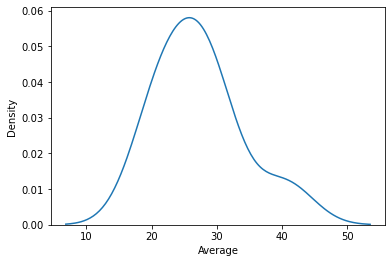

In [82]:
import seaborn as sns
sns.kdeplot(yearwise['Average'])